In [8]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np


In [ ]:
#ESERCIZIO 0

In [ ]:
Z = st.norm
print(Z.ppf(0.75))

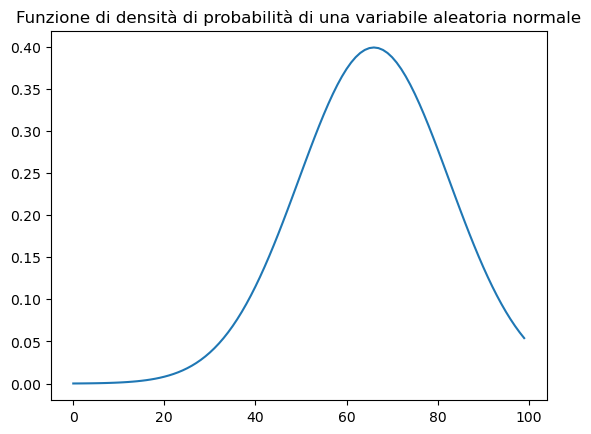

In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Z = st.norm(1, 1)     
x = np.linspace(-3,3,100)   
y = Z.pdf(x)
plt.title('Funzione di densità di probabilità di una variabile aleatoria normale')
plt.plot(y)
plt.show()

In [5]:
Y = st.norm()
print(Y.cdf(2)-Y.cdf(-2))

0.9544997361036416


In [6]:
#ESERCIZIO 1

In [10]:
cani = pd.read_csv('cani.csv', sep = ';', decimal = ',', index_col=0) 
cani

,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
Cartella,,,,,,,,,,,,,,,,,,,
S0601,NO,0,10.35,0,NaN,0,2,NO,5.25,0.00,2.50,1.15,0.97,70.0,37.0,78.69,23.75,1.58,0.99
C0621,NO,0,15.21,1,1.0,341,3,NO,6.00,0.00,1.61,1.50,1.47,83.0,51.0,130.58,23.88,1.94,0.99
B0918,NO,0,15.77,1,1.0,117,3,NO,3.20,0.00,2.50,1.87,2.08,91.0,62.0,180.35,16.22,2.21,0.84
R1009,NO,0,13.54,1,1.0,93,4,SI,26.50,0.00,3.07,2.28,2.85,75.0,44.0,234.17,40.15,2.09,1.16
R1513,NO,0,10.72,0,NaN,666,3,NO,11.00,0.00,2.54,0.75,0.86,69.0,38.0,139.84,43.89,1.98,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G1006,SI,3,11.35,1,1.0,46,4,NO,8.80,4.51,2.77,1.74,NaN,78.0,46.0,260.51,41.33,2.23,1.21
A1403,SI,3,13.39,1,1.0,275,4,NO,8.00,4.54,2.49,NaN,NaN,74.0,41.0,104.55,29.51,1.76,1.03
Z1003,SI,3,12.40,1,1.0,43,3,NO,14.00,4.60,2.52,NaN,NaN,77.0,46.0,371.13,57.22,2.54,1.36


In [11]:
#1. Quanti sono i cani dell'ambulatorio?
len(cani)

161

In [12]:
#2. Quanti cani soffrono di ipertensione?
len(cani[cani['IP'] == 'SI'])

58

In [13]:
#3. Consideriamo ora l'età dei pazienti

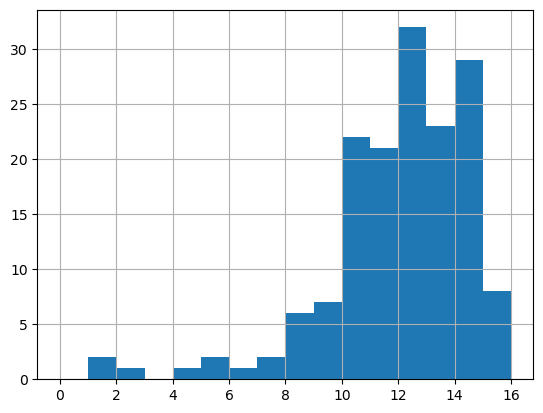

In [17]:
'''
3.1 Tracciare un istogramma dell'età dei cani, fissando ad un anno l'ampiezza delle classi e
considerando gli intervalli chiusi a sinistra e aperti a destra.'''
cani['EtaAnni'].hist(bins = np.hstack(np.arange(
                    0, cani['EtaAnni'].max(),1)))
plt.show()

In [18]:
#3.2 Descrivere l'età dei pazienti, usando diversi indici di centralità e dispersione
cani['EtaAnni'].describe()

count    161.000000
mean      12.124658
std        2.627775
min        1.220000
25%       10.890000
50%       12.550000
75%       14.060000
max       16.840000
Name: EtaAnni, dtype: float64

In [19]:
#3.3 Quanti sono i pazienti con età compresa tra 12 anni (incluso) e 13 anni (escluso)?
cani_12 = cani[cani['EtaAnni'] >= 12]
len(cani_12[cani_12['EtaAnni'] < 13])

32

In [20]:
#3.4 Quanti anni ha il cane più anziano?
cani['EtaAnni'].max()

16.84

In [21]:
#3.5 Qual'è l'età maggiormente rappresentata?
cani['EtaAnni'].mode()

0    14.25
1    14.73
Name: EtaAnni, dtype: float64

In [22]:
#4 Consideriamo MORTE e MC 

In [25]:
#4.1 Quanti cani sono deceduti?
len(cani[cani['MORTE'] == 1])

118

In [29]:
'''
4.2 Nell'inserire le info riguardo a un cane deceduto, l'operatore ha sempre specificato se la morte è
avvenuta per cause cardiache o altre cause? Se no, in quanti casi è stata omessa tale info?
''' 
cani[cani['MORTE'] == 1].MC.isna().value_counts()

False    115
True       3
Name: MC, dtype: int64

In [30]:
#4.3 Controllare che non ci siano cani registrati come vivi ma morti di morte cardiaca
cani_vivi = cani[cani['MORTE'] == 0]
len(cani_vivi[cani_vivi['MC'] == 1])

0

In [31]:
#4.4 Quanti cani sono morti per cause cardiache?
len(cani[cani['MC'] == 1])

87

In [33]:
#4.5 Tra le morti avvenute, quale percentuale è stata per cause cardiache?
(len(cani[cani['MC'] == 1]) / len(cani[cani['MORTE'] == 1]))*100

73.72881355932203

In [34]:
#5 GravitaIP è un indice di gravità dell'ipertensione

In [36]:
#5.1 Si tratta di un carattere scalare, ordinale o nominale?
cani['GravitaIP']
print('Carattere ordinale')

Carattere ordinale


In [37]:
#5.2 Quali valori può assumere
print('[', cani['GravitaIP'].min(), cani['GravitaIP'].max(), ']')

[ 0 3 ]


In [42]:
#5.3 Produrre la tabella delle frequenze relative di GravitaIP
gravitaIP_rel = pd.crosstab(index = cani['GravitaIP'],
                            columns = ['Frequenza relativa'],
                           colnames = [''],
                           normalize = True)
gravitaIP_rel

,Frequenza relativa
GravitaIP,
0,0.639752
1,0.180124
2,0.111801
3,0.068323


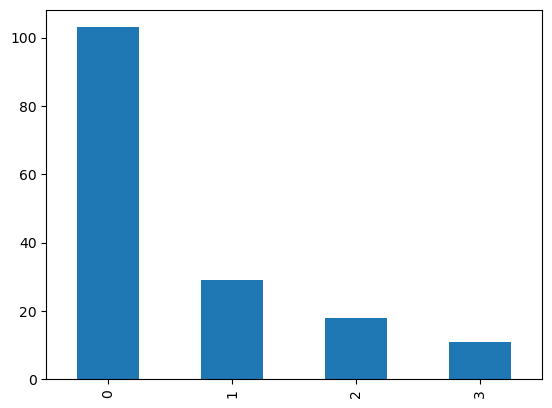

In [45]:
#5.4 Tracciare un grafico opportuno per descrivere la gravità dell'ipertensione
cani['GravitaIP'].value_counts().plot.bar()
plt.show()

In [46]:
'''
6. SURVIVALTIME ci dice per quanti giorni il paziente è rimasto vivo a partire dalla prima visita 
presso l'ambulatorio. La distribuzione delle frequenze del tempo di sopravvivenza ha un aspetto molto
diverso se si considera rispetto ai cani ancor vivi o quelli morti.
'''

"\n6. SURVIVALTIME ci dice per quanti giorni il paziente è rimasto vivo a partire dalla prima visita \npresso l'ambulatorio. La distribuzione delle frequenze del tempo di sopravvivenza ha un aspetto molto\ndiverso se si considera rispetto ai cani ancor vivi o quelli morti.\n"

In [48]:
#6.1 Quale percentuale di cani ancora vivi è in cura presso l'ambulatorio da meno di un anno?
(len(cani_vivi[cani_vivi['SURVIVALTIME'] < 365])/len(cani_vivi))*100

65.11627906976744

In [49]:
#6.2 Quale percentuale di cani deceduti è sopravvissuta più di 3 anni?
cani_morti = cani[cani['MORTE'] == 1]
(len(cani_morti[cani_morti['SURVIVALTIME'] > 1095])/len(cani_morti))*100

10.16949152542373

In [50]:
#ESERCIZIO 2

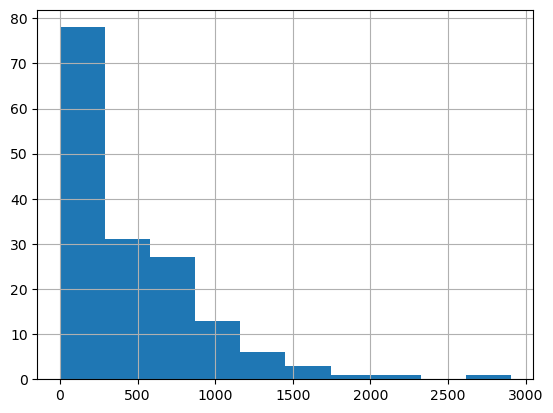

In [56]:
#1. Tracciare un grafico opportuno per descrivere il tempo di sorpavvivenza
cani['SURVIVALTIME']
cani['SURVIVALTIME'].hist()
plt.show()

In [ ]:
'''
Le osservazioni di SURVIVALTIME costituiscono un campione casuale X1...Xn estratto dalla popolazione
X = "tempo di sopravvivenza espresso in giorni dei cani che potenzialmente afferiscono all'ambulatorio"
'''

In [57]:
#2. Calcolare una stima del tempo di sopravvivenza atteso 
cani['SURVIVALTIME'].mean()

459.888198757764

In [58]:
#3. Esprimere, in funzione di X1...Xn, lo stimatore Tn usato per la stima del punto precedente
print('Lo stimatore Tn usato al punto precedente è la media campionaria del campione X1...Xn')

Lo stimatore Tn usato al punto precedente è la media campionaria del campione X1...Xn


In [59]:
#4. Tale stimatore è non distorto? Giustificare
print('Lo stimatore Tn è non distorto perchè la media campionaria è sempre uno stimatore non\ndistorto per il valore atteso della popolazione.')

Lo stimatore Tn è non distorto perchè la media campionaria è sempre uno stimatore non
distorto per il valore atteso della popolazione.


In [61]:
#5. Esprimere, in funzione di n e della dev standard della popolazione, la dev standard di Tn
print('Dev standard = sqrt(Var(media campionaria(X1...Xn))) = dev standard/sqrt(n)')

Dev standard = sqrt(Var(media campionaria(X1...Xn))) = dev standard/sqrt(n)


In [62]:
#6. Calcolare una stima della deviazione standard del tempo di sopravvivenza
cani['SURVIVALTIME'].std()

467.1967063479367

In [67]:
'''
7. Determinare un numero di osservazioni sufficiente affinchè, nella stima del tempo sopravvivenza 
atteso, si compia un errore al più di due mesi con probabilità almeno uguale a 0.9
Ragionamento scritto sulle note
'''
Z = st.norm()
a = cani['SURVIVALTIME'].std() / 60
arg = 1-(0.1/2)
(a*(Z.ppf(arg)))**2

164.04067877198327

In [68]:
#9. Stimatore del tempo di sopravvivenza atteso espresso in anni
cani['SURVIVALTIME'].mean() / 365

1.2599676678294904

In [69]:
#10. Lo stimatore del punto precedente è non distorto? Giustificare
print('Lo stimatore Tn è non distorto perchè la media campionaria è sempre uno stimatore non\ndistorto per il valore atteso della popolazione.')

Lo stimatore Tn è non distorto perchè la media campionaria è sempre uno stimatore non
distorto per il valore atteso della popolazione.


In [70]:
#ESERCIZIO 3

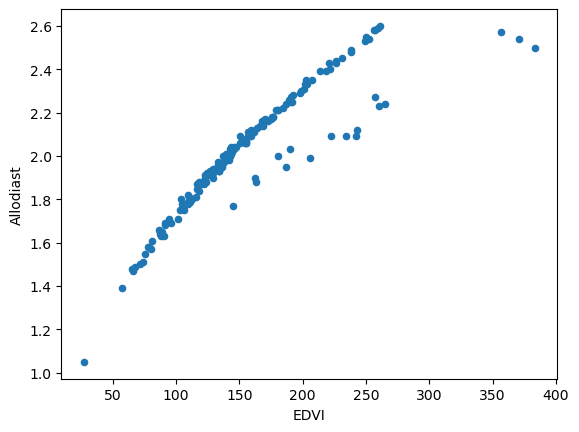

lo scatter plot evidenzia una relazione di tipo diretto tra i due caratteri
0.9073039817753574
indice di correlazione prossimo ad 1 conferma tale ipotesi


In [75]:
#1. EDVI e Allodiast sono indipendenti? Giustificare
cani.plot.scatter('EDVI', 'Allodiast')
plt.show()
print('lo scatter plot evidenzia una relazione di tipo diretto tra i due caratteri')
print(cani['EDVI'].corr(cani['Allodiast']))
print('indice di correlazione prossimo ad 1 conferma tale ipotesi')

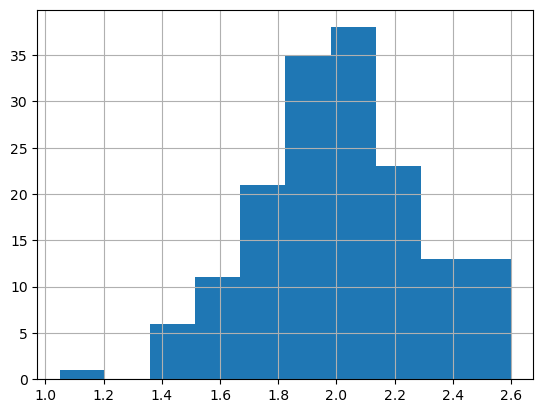

Guardando l istogramma di Allodiast, si nota come esso assuma una forma a campana che
caratterizza le distribuzioni normali.
2.0133540372670815 2.0
I valori di media e mediana molto simili confermano il fatto evidenziato dall istogramma,
ossia che Allodiast segue una legge normale.


In [78]:
#2. Confermare l'affermazione: "la variabile allodiast segue una legge normale"
cani['Allodiast'].hist()
plt.show()
print('Guardando l istogramma di Allodiast, si nota come esso assuma una forma a campana che\ncaratterizza le distribuzioni normali.')
print(cani['Allodiast'].mean(), cani['Allodiast'].median())
print('I valori di media e mediana molto simili confermano il fatto evidenziato dall istogramma,\nossia che Allodiast segue una legge normale.')

In [81]:
#4. Verificare se le osservazioni di Allodiast sono coerenti con la proprietà al punto 3.4 dell'Es 0
Y = st.norm(cani['Allodiast'].mean(), cani['Allodiast'].std())
Y.cdf(2) - Y.cdf(-2)

0.48095296951537236